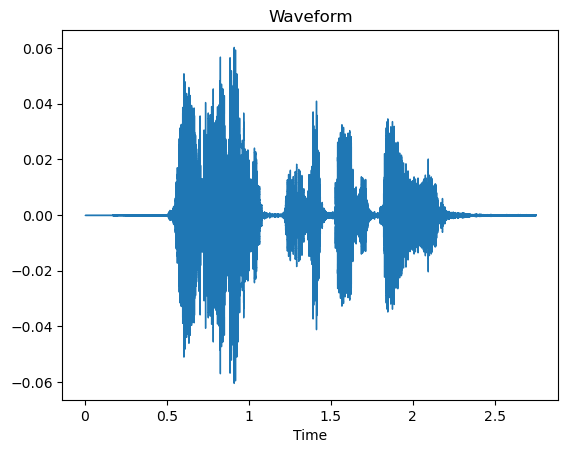

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
file_path = "C:/Users/Sreyas/Desktop/Desktop/amrita/3rd year/6th Sem/speech processing/speech labs/Lab 2/speech1.ogg"
y, sr = librosa.load(file_path)

# Display the waveform
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


from IPython.display import Audio

org=Audio(data=y, rate=sr)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.56652220e-06
  2.27069086e-06 -9.07443246e-06]


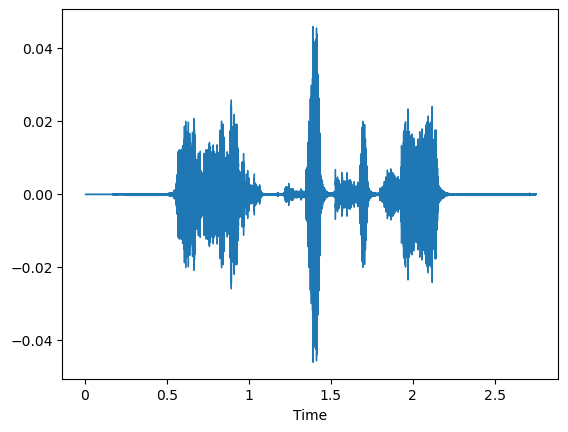

In [16]:
import numpy as np
 
First_derivative = np.zeros(len(y))
First_derivative[0]=y[0]
for i in range (1,len(y)):
    First_derivative[i]=y[i]-y[i-1]
print(First_derivative)
librosa.display.waveshow(First_derivative)

In [17]:
Audio(data=First_derivative, rate=sr)

C:\Users\Sreyas\AppData\Local\Temp\ipykernel_15136\326776176.py:7: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(delta, sr=sr, x_axis='time')


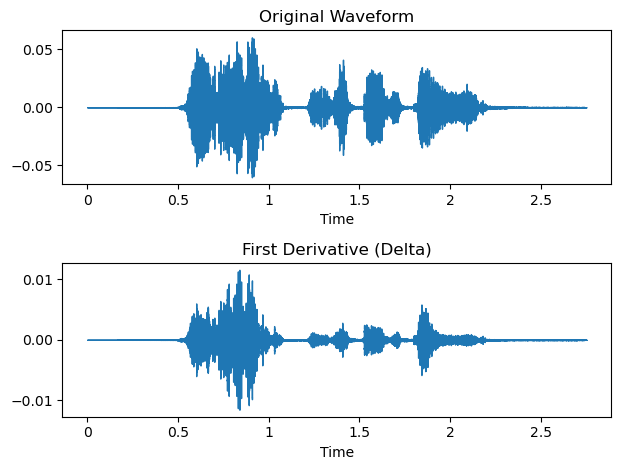

In [11]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')
delta=librosa.feature.delta(y)

plt.subplot(2, 1, 2)
librosa.display.waveshow(delta, sr=sr, x_axis='time')
plt.title('First Derivative (Delta)')
plt.tight_layout()
plt.show()

y_with_deri=delta
Audio(data=y_with_deri, rate=sr)

In [22]:
import numpy as np
zero_cros=librosa.zero_crossings(delta, pad=False)
crossing_indices = np.where(zero_cros)[0]
crossing_intervals = np.diff(crossing_indices) / sr 


speech_threshold = 0.1 
speech_intervals = crossing_intervals[crossing_intervals > speech_threshold]
silence_intervals = crossing_intervals[crossing_intervals <= speech_threshold]

avg_speech_length = np.mean(speech_intervals)
avg_silence_length = np.mean(silence_intervals)

print(f'Average Length between Consecutive Zero Crossings (Speech): {avg_speech_length:.4f} seconds')
print(f'Average Length between Consecutive Zero Crossings (Silence): {avg_silence_length:.4f} seconds')

Average Length between Consecutive Zero Crossings (Speech): nan seconds
Average Length between Consecutive Zero Crossings (Silence): 0.0003 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


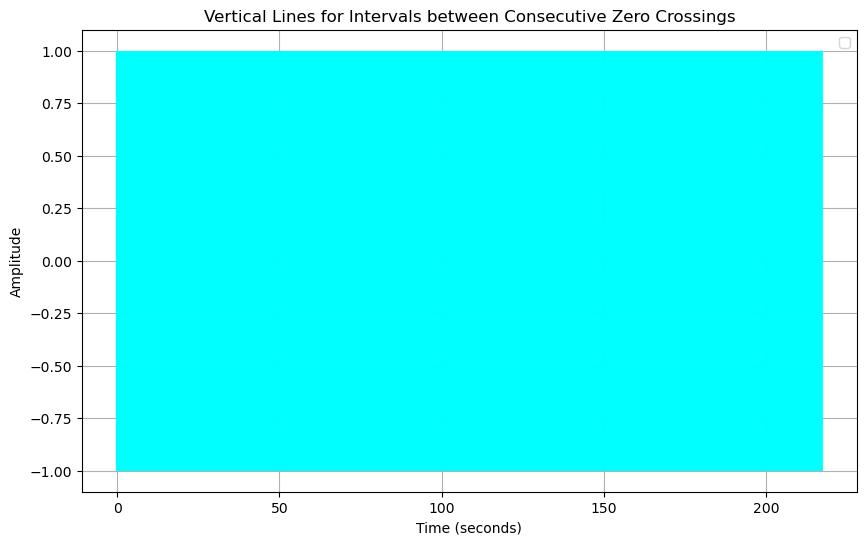

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.vlines(librosa.frames_to_time(np.where(speech_intervals)),1,-1, alpha=0.5)
plt.vlines(librosa.frames_to_time(np.where(silence_intervals)),1,-1,color = "cyan", alpha=0.5)



plt.title('Vertical Lines for Intervals between Consecutive Zero Crossings')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

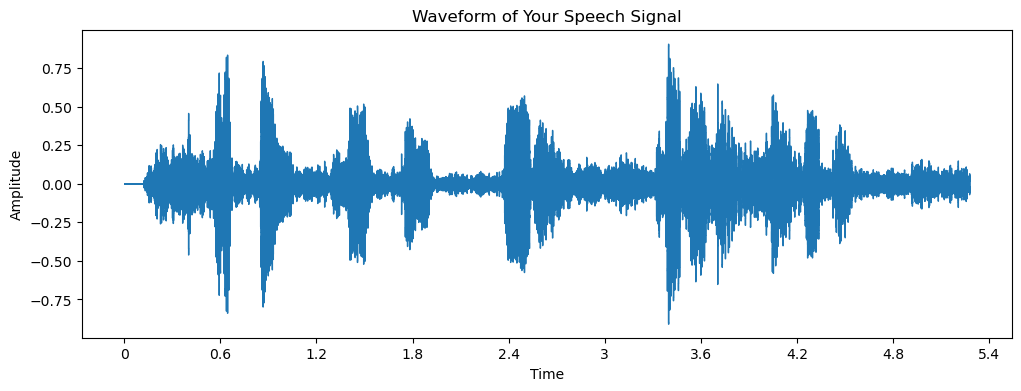

Duration of your speech signal: 5.277823129251701 seconds


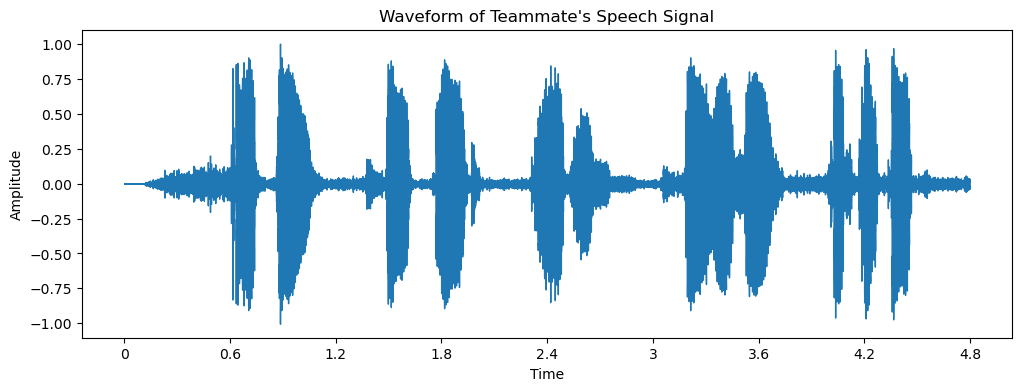

Duration of your project team-mate's speech signal: 4.797823129251701 seconds


In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd


y, sr = librosa.load("C:/Users/Sreyas/Desktop/Vishwash1.opus")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Your Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

duration = librosa.get_duration(y=y, sr=sr)
print(f'Duration of your speech signal: {duration} seconds')
y_team, sr_team = librosa.load("C:/Users/Sreyas/Desktop/Sreyas1.opus")

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_team, sr=sr_team)
plt.title('Waveform of Teammate\'s Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

duration_teammate = librosa.get_duration(y=y_team, sr=sr_team)
print(f'Duration of your project team-mate\'s speech signal: {duration_teammate} seconds')

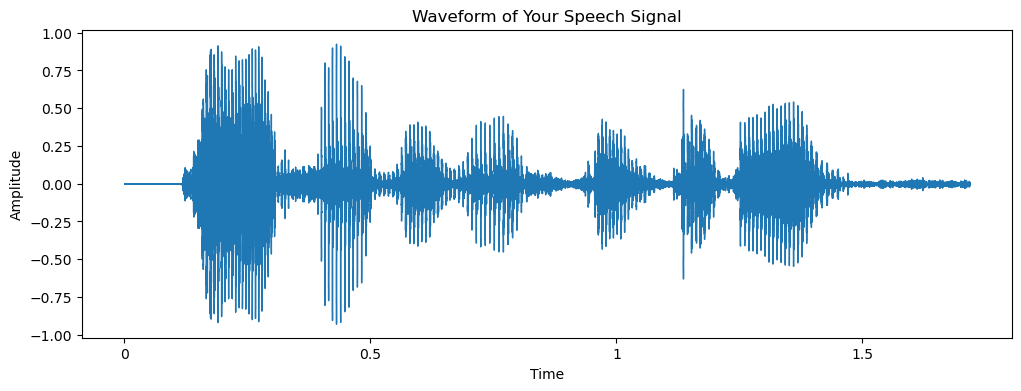

Duration of your speech signal: 1.7178231292517008 seconds


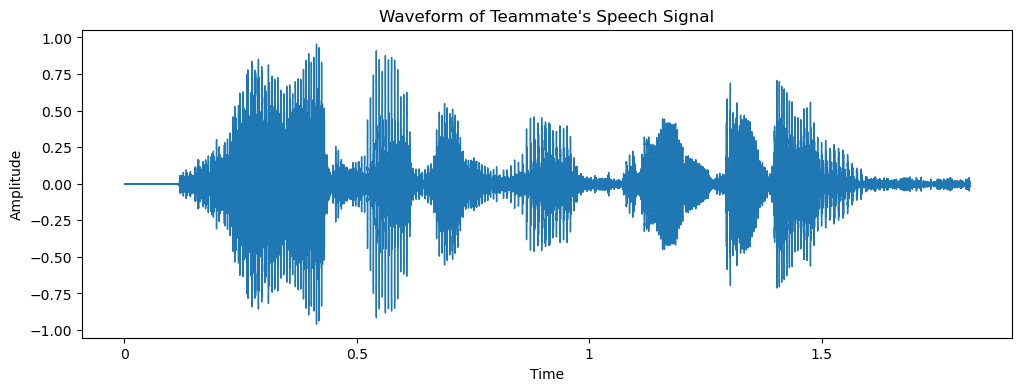

Duration of your project team-mate's speech signal: 1.8178231292517006 seconds


In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd


y, sr = librosa.load("C:/Users/Sreyas/Desktop/ques1.opus")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Your Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

duration = librosa.get_duration(y=y, sr=sr)
print(f'Duration of your speech signal: {duration} seconds')
y_team, sr_team = librosa.load("C:/Users/Sreyas/Desktop/ques2.opus")

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_team, sr=sr_team)
plt.title('Waveform of Teammate\'s Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

duration_teammate = librosa.get_duration(y=y_team, sr=sr_team)
print(f'Duration of your project team-mate\'s speech signal: {duration_teammate} seconds')

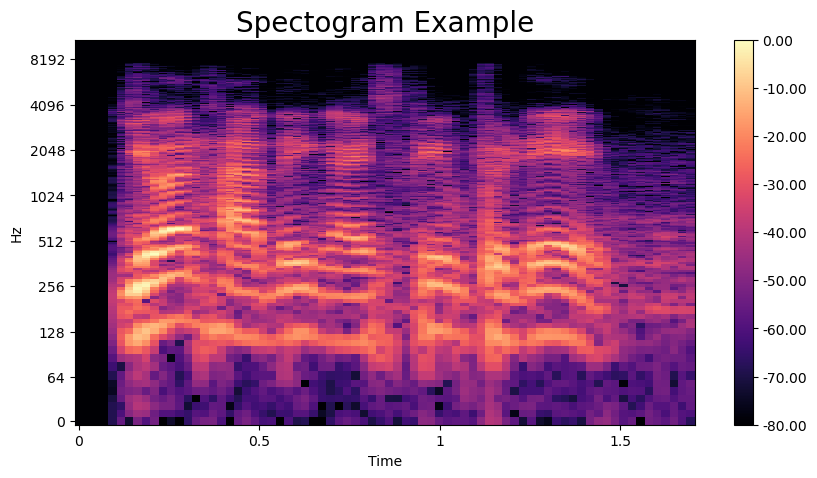

In [27]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
(1025, 153)
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

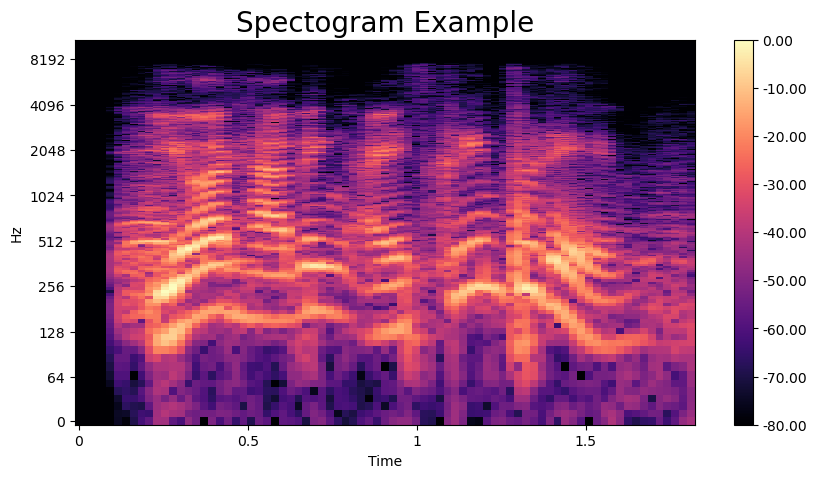

In [28]:
D = librosa.stft(y_team)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
(1025, 153)
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()